In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import utilities 

# Load input data
input_file = 'data_multivar.txt'
X, y = utilities.load_data(input_file)

In [2]:
# Train test split
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

params = {'kernel': 'rbf'}
classifier = SVC(**params)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
# Measure distance from the boundary

input_datapoints = np.array([[2, 1.5], [8, 9], [4.8, 5.2], [4, 4], [2.5, 7], [7.6, 2], [5.4, 5.9]])
print ("Distance from the boundary:")
for i in input_datapoints:
    print (i, '-->', classifier.decision_function([i])[0])


Distance from the boundary:
[2.  1.5] --> 1.4641534796440951
[8. 9.] --> 1.2027833384010422
[4.8 5.2] --> -1.9202588134880436
[4. 4.] --> -0.13555127690004642
[2.5 7. ] --> 0.6173950571872193
[7.6 2. ] --> 2.0058455177573045
[5.4 5.9] --> -1.3395252492125262


Confidence measure:
[2.  1.5] --> [0.01617191 0.98382809]
[8. 9.] --> [0.03271503 0.96728497]
[4.8 5.2] --> [0.99470532 0.00529468]
[4. 4.] --> [0.57689148 0.42310852]
[2.5 7. ] --> [0.14555204 0.85444796]
[7.6 2. ] --> [0.00366846 0.99633154]
[5.4 5.9] --> [0.97374783 0.02625217]


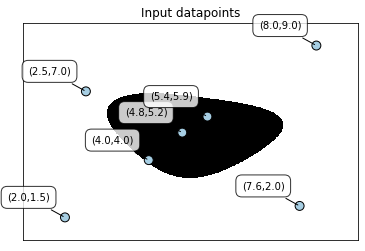

In [8]:
# Confidence measure
params = {'kernel': 'rbf', 'probability': True}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
print ("Confidence measure:")
for i in input_datapoints:
    print (i, '-->', classifier.predict_proba([i])[0])

utilities.plot_classifier(classifier, input_datapoints, [0]*len(input_datapoints), 'Input datapoints', 'True')
plt.show()    